In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Experiment': ['Baseline', 'AGC (Default)', 'LR Sweep (No AGC)', 'LR Sweep (No AGC)',
                   'LR Sweep (No AGC)', 'LR Sweep (No AGC)', 'LR Sweep (AGC)',
                   'LR Sweep (AGC)', 'LR Sweep (AGC)', 'LR Sweep (AGC)'],
    'LR': [11.5, 11.5, 2.5, 5.75, 23.0, 46.0, 2.5, 5.75, 23.0, 46.0],
    'Time_Mean': [4.2437, 4.1395, 4.1092, 3.9443, 4.1179, 4.5440, 5.1493, 4.8391, 4.1530, 4.8801],
    'Time_SD': [2.3105, 1.9400, 1.6153, 1.8000, 1.6386, 1.5540, 2.1077, 1.8197, 1.6640, 1.9078],
    'AGC': [False, True, False, False, False, False, True, True, True, True]
}

df = pd.DataFrame(data)
print("Data Summary:")
print(df.to_string(index=False))

Data Summary:
       Experiment    LR  Time_Mean  Time_SD   AGC
         Baseline 11.50     4.2437   2.3105 False
    AGC (Default) 11.50     4.1395   1.9400  True
LR Sweep (No AGC)  2.50     4.1092   1.6153 False
LR Sweep (No AGC)  5.75     3.9443   1.8000 False
LR Sweep (No AGC) 23.00     4.1179   1.6386 False
LR Sweep (No AGC) 46.00     4.5440   1.5540 False
   LR Sweep (AGC)  2.50     5.1493   2.1077  True
   LR Sweep (AGC)  5.75     4.8391   1.8197  True
   LR Sweep (AGC) 23.00     4.1530   1.6640  True
   LR Sweep (AGC) 46.00     4.8801   1.9078  True


In [ ]:

no_agc_all = df[df['AGC'] == False].copy()
sweep_no_agc = no_agc_all.sort_values('LR').reset_index(drop=True)

agc_all = df[df['AGC'] == True].copy()
sweep_agc = agc_all.sort_values('LR').reset_index(drop=True)

print("No AGC data (5 entries):")
print(sweep_no_agc[['LR', 'Time_Mean', 'Time_SD']])
print("\nAGC data (5 entries):")
print(sweep_agc[['LR', 'Time_Mean', 'Time_SD']])

No AGC data (5 entries):
      LR  Time_Mean  Time_SD
0   2.50     4.1092   1.6153
1   5.75     3.9443   1.8000
2  11.50     4.2437   2.3105
3  23.00     4.1179   1.6386
4  46.00     4.5440   1.5540

AGC data (5 entries):
      LR  Time_Mean  Time_SD
0   2.50     5.1493   2.1077
1   5.75     4.8391   1.8197
2  11.50     4.1395   1.9400
3  23.00     4.1530   1.6640
4  46.00     4.8801   1.9078


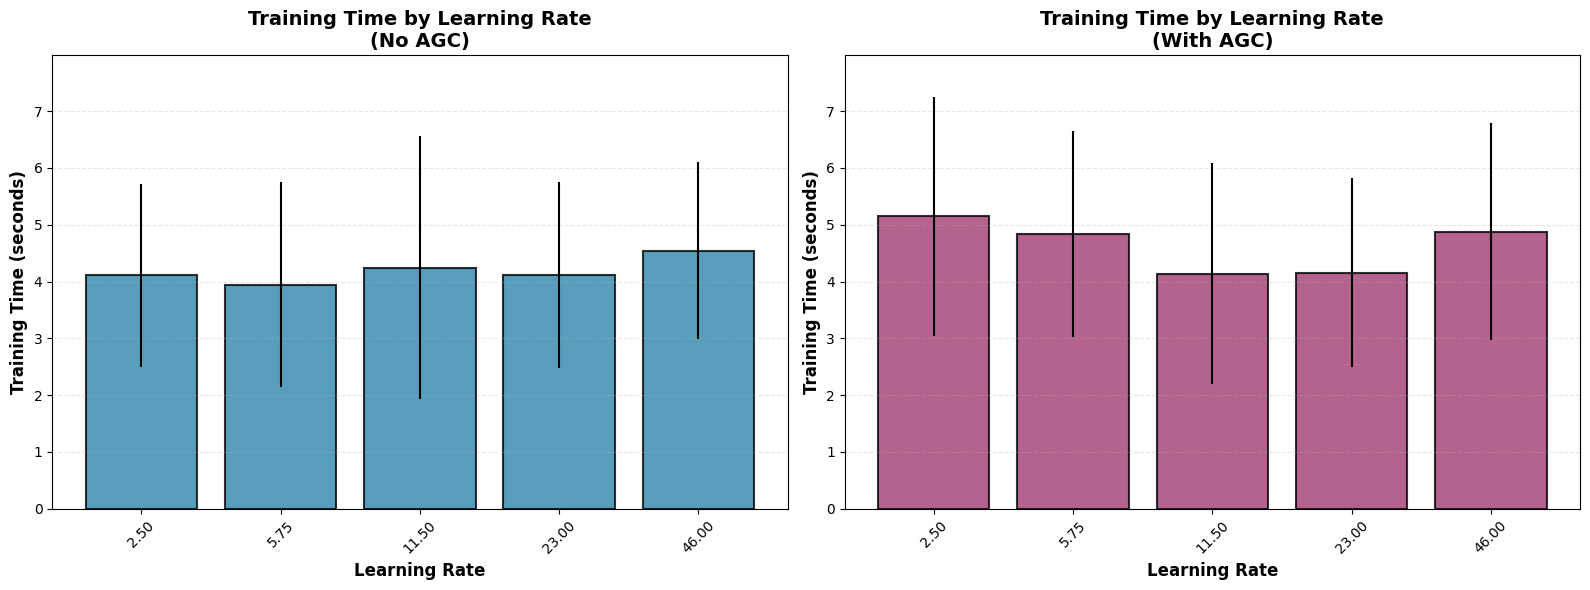

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x_pos_no_agc = range(len(sweep_no_agc))
bars1 = ax1.bar(x_pos_no_agc, sweep_no_agc['Time_Mean'],
                yerr=sweep_no_agc['Time_SD'],
                color='#2E86AB',
                edgecolor='black', linewidth=1.5, alpha=0.8)

ax1.set_xlabel('Learning Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Training Time by Learning Rate\n(No AGC)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos_no_agc)
ax1.set_xticklabels([f'{lr:.2f}' for lr in sweep_no_agc['LR']], rotation=45)
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')

# Bar graph for AGC
x_pos_agc = range(len(sweep_agc))
bars2 = ax2.bar(x_pos_agc, sweep_agc['Time_Mean'],
                yerr=sweep_agc['Time_SD'],
                color='#A23B72',
                edgecolor='black', linewidth=1.5, alpha=0.8)

ax2.set_xlabel('Learning Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Training Time by Learning Rate\n(With AGC)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos_agc)
ax2.set_xticklabels([f'{lr:.2f}' for lr in sweep_agc['LR']], rotation=45)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

max_no_agc = (sweep_no_agc['Time_Mean'] + sweep_no_agc['Time_SD']).max()
max_agc = (sweep_agc['Time_Mean'] + sweep_agc['Time_SD']).max()
y_max = max(max_no_agc, max_agc) * 1.1

ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()